In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from bids.modeling.hrf import compute_regressor as compute_regressor_pybids
from matplotlib import pyplot as plt
from nilearn_hrf_functions import compute_regressor as compute_regressor_nilearn


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Similar enough to the data Michael is working with

dur = 30
exp_condition = np.array(
    [[1, 20 + dur, 40 + 2 * dur, 60 + 3 * dur], [dur, dur, dur, dur], [1, 1, 1, 1]]
)
t_r = 3
max_tr = np.max(exp_condition[0, :] + exp_condition[1, :]) + 20
hrf_model = 'fir'
frame_times = np.arange(0, max_tr, t_r)
fir_delays = [0, 3, 6]


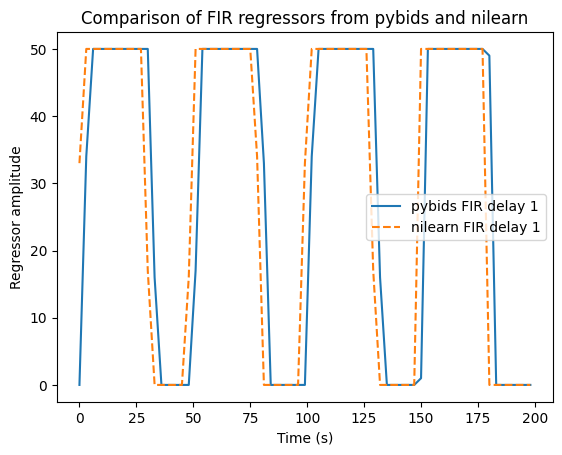

In [7]:
regs_pybids, reg_names_pybids = compute_regressor_pybids(
    exp_condition,
    hrf_model=hrf_model,
    frame_times=frame_times,
    fir_delays=fir_delays,
    oversampling=50,
)

regs_nilearn, reg_names_nilearn = compute_regressor_nilearn(
    exp_condition,
    hrf_model=hrf_model,
    frame_times=frame_times,
    fir_delays=fir_delays,
    oversampling=50,
)

# I multiply by 50 to fix a scaling issue in pybids
plt.plot(frame_times, regs_pybids[:, 0], label='pybids FIR delay 1')
plt.plot(
    frame_times, regs_nilearn[:, 0] * 50, label='nilearn FIR delay 1', linestyle='--'
)
plt.legend()
plt.title('Comparison of FIR regressors from pybids and nilearn')
plt.xlabel('Time (s)')
plt.ylabel('Regressor amplitude')
plt.show()

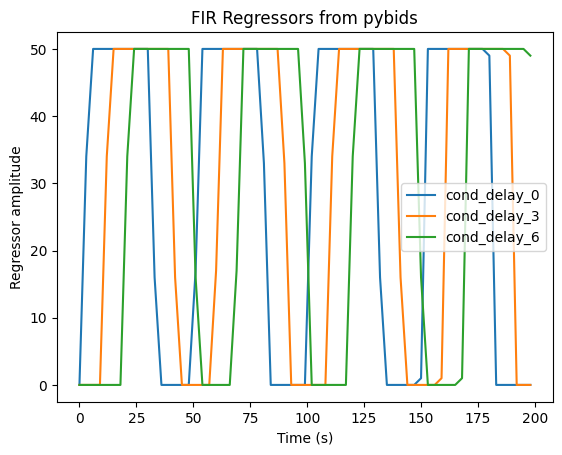

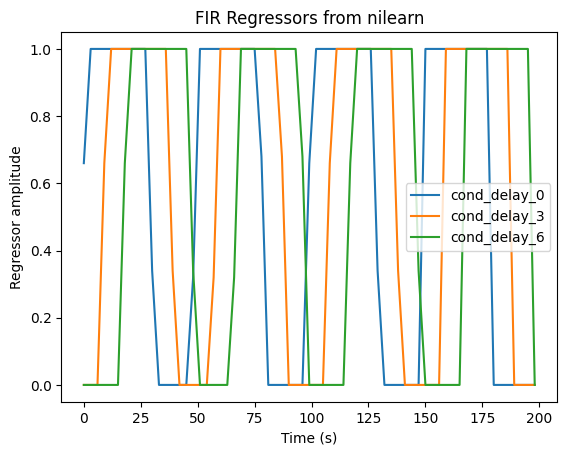

In [8]:
plt.plot(frame_times, regs_pybids[:, 0], label=reg_names_pybids[0])
plt.plot(frame_times, regs_pybids[:, 1], label=reg_names_pybids[1])
plt.plot(frame_times, regs_pybids[:, 2], label=reg_names_pybids[2])
plt.xlabel('Time (s)')
plt.ylabel('Regressor amplitude')
plt.title('FIR Regressors from pybids')
plt.legend()
plt.show()

plt.plot(frame_times, regs_nilearn[:, 0], label=reg_names_nilearn[0])
plt.plot(frame_times, regs_nilearn[:, 1], label=reg_names_nilearn[1])
plt.plot(frame_times, regs_nilearn[:, 2], label=reg_names_nilearn[2])
plt.xlabel('Time (s)')
plt.ylabel('Regressor amplitude')
plt.title('FIR Regressors from nilearn')
plt.legend()
plt.show()